## Getting Started

bellow examples show how one can use this package to find flagged fault tolerant circuits for CSS state preparation. There are two main methods: `build_ft_circuit` and `build_ft_circuit_compact`. The only difference is that the latter, re-uses flag ancillas after they are measured for the rest of the circuit, hence lowering the number of required qubits at the cost of (slightly) increasing the depth of the found circuit. The first `n` qubits in the output of the circuits built by these functions (index `0` to `n-1`) correspond to the `n`-qubits CSS state. 

The example below is for preparing the logical zero state of the Stean code. We use the [stabgraph](https://github.com/davamaro/stabgraph) python package to find a non-fault-tolerant bipartite prep circuit, which then is made fault tolerant by stitching flag at origin gadgets to it. Install `stabgraph` directly from it [github repo](https://github.com/davamaro/stabgraph), since as of now (Oct 20 2025) the version on PyPI is not compatible with newer versions of Python.

The non-fault-tolerant bipartite circuit for a stabilizer state is not unique. The `shuffle=True` argument in `stabgraph.convert` makes stabgraph to randomly choose one. One can generate many random samples and look for the one with the smallest degree and/or smallest number of edges to get a better circuit. The degree of a vertex in the graph `G` corresponds to the number of targets for the flag at origin gadgets. Hence, if the gadget for a graph representation is not pre-computed, one mught be able to get around that by finding a graph with a smaller degree. The number of edges in `G` is equal to the number of CNOTs in the non-ft circuit, and is kind of correlated to the number of CNOTs in the flagged ft circuit. 





In [1]:
!pip install stabgraph

In [7]:
import stabgraph as stg
import flag_stitcher

stabs=['XXIXIXI','IXXXXII','IIIXXXX','ZZIZIZI','IZZZZII','IIIZZZZ','ZZZIIII']
stabs_16_7_3_0s = [
"IIIIIIIZZZZZZZZ",
"IIIZZZZIIIIZZZZ",
"IZZIIZZIIZZIIZZ",
"ZIZIZIZIZIZIZIZ",
"IIIIIIIXXXXXXXX",
"IIIXXXXIIIIXXXX",
"IXXIIXXIIXXIIXX",
"XIXIXIXIXIXIXIX",
"ZZIZIIIZIIIIIIZ",
"ZZIIZIIIIZIZIII",
"ZZIIIZIIIIZIIZI",
"ZZIIIIZIZIIIZII",
"ZIIZIZIIZZIIIII",
"ZIIZIIZIIIIZIZI",
"ZIIIIIIZIZIIZZI",
]
stabs_16_7_3_bell = [
"IIIIIIIZZZZZZZZIIIIIIIIIIIIIII",
"IIIZZZZIIIIZZZZIIIIIIIIIIIIIII",
"IZZIIZZIIZZIIZZIIIIIIIIIIIIIII",
"ZIZIZIZIZIZIZIZIIIIIIIIIIIIIII",
"IIIIIIIXXXXXXXXIIIIIIIIIIIIIII",
"IIIXXXXIIIIXXXXIIIIIIIIIIIIIII",
"IXXIIXXIIXXIIXXIIIIIIIIIIIIIII",
"XIXIXIXIXIXIXIXIIIIIIIIIIIIIII",
"IIIIIIIIIIIIIIIIIIIIIIZZZZZZZZ",
"IIIIIIIIIIIIIIIIIIZZZZIIIIZZZZ",
"IIIIIIIIIIIIIIIIZZIIZZIIZZIIZZ",
"IIIIIIIIIIIIIIIZIZIZIZIZIZIZIZ",
"IIIIIIIIIIIIIIIIIIIIIIXXXXXXXX",
"IIIIIIIIIIIIIIIIIIXXXXIIIIXXXX",
"IIIIIIIIIIIIIIIIXXIIXXIIXXIIXX",
"IIIIIIIIIIIIIIIXIXIXIXIXIXIXIX",
"XXIXIIIXIIIIIIXXXIXIIIXIIIIIIX",
"ZZIZIIIZIIIIIIZZZIZIIIZIIIIIIZ",
"XXIIXIIIIXIXIIIXXIIXIIIIXIXIII",
"ZZIIZIIIIZIZIIIZZIIZIIIIZIZIII",
"XXIIIXIIIIXIIXIXXIIIXIIIIXIIXI",
"ZZIIIZIIIIZIIZIIIIIIZZIZIZIZZI",
"XXIIIIXIXIIIXIIXIIIIXXXXXXIIII",
"ZZIIIIZIZIIIZIIZZIIIIZIZIIIZII",
"XIIXIXIIXXIIIIIXIIXIXIIXXIIIII",
"ZIIZIZIIZZIIIIIZIIZIZIIZZIIIII",
"XIIXIIXIIIIXIXIXIIXIIXIIIIXIXI",
"ZIIZIIZIIIIZIZIZIIZIIZIIIIZIZI",
"XIIIIIIXIXIIXXIXIIIIIIXIXIIXXI",
"ZIIIIIIZIZIIZZIIZIIIIZZZZIIIZI",
]

distance=3
G,c,t,_,_=stg.convert(stabs_16_7_3_bell, shuffle=True)
operations = flag_stitcher.build_ft_circuit(G,c,t,distance)
operations

[('R', [9]),
 ('H', [9]),
 ('R', [39]),
 ('CNOT', [9, 39]),
 ('R', [25]),
 ('R', [55]),
 ('H', [55]),
 ('CNOT', [55, 25]),
 ('CNOT', [9, 25]),
 ('R', [22]),
 ('R', [52]),
 ('H', [52]),
 ('CNOT', [52, 22]),
 ('CNOT', [9, 22]),
 ('R', [21]),
 ('R', [51]),
 ('H', [51]),
 ('CNOT', [51, 21]),
 ('CNOT', [9, 21]),
 ('R', [19]),
 ('R', [49]),
 ('H', [49]),
 ('CNOT', [49, 19]),
 ('CNOT', [9, 19]),
 ('R', [15]),
 ('R', [45]),
 ('H', [45]),
 ('CNOT', [45, 15]),
 ('CNOT', [9, 15]),
 ('R', [8]),
 ('R', [38]),
 ('H', [38]),
 ('CNOT', [38, 8]),
 ('CNOT', [9, 8]),
 ('R', [5]),
 ('R', [35]),
 ('H', [35]),
 ('CNOT', [35, 5]),
 ('CNOT', [9, 5]),
 ('R', [3]),
 ('R', [33]),
 ('H', [33]),
 ('CNOT', [33, 3]),
 ('CNOT', [9, 3]),
 ('R', [0]),
 ('R', [30]),
 ('H', [30]),
 ('CNOT', [30, 0]),
 ('CNOT', [9, 0]),
 ('CNOT', [9, 39]),
 ('M', [39]),
 ('R', [18]),
 ('H', [18]),
 ('R', [48]),
 ('CNOT', [18, 48]),
 ('CNOT', [18, 25]),
 ('R', [23]),
 ('R', [53]),
 ('H', [53]),
 ('CNOT', [53, 23]),
 ('CNOT', [18, 23]),
 ('

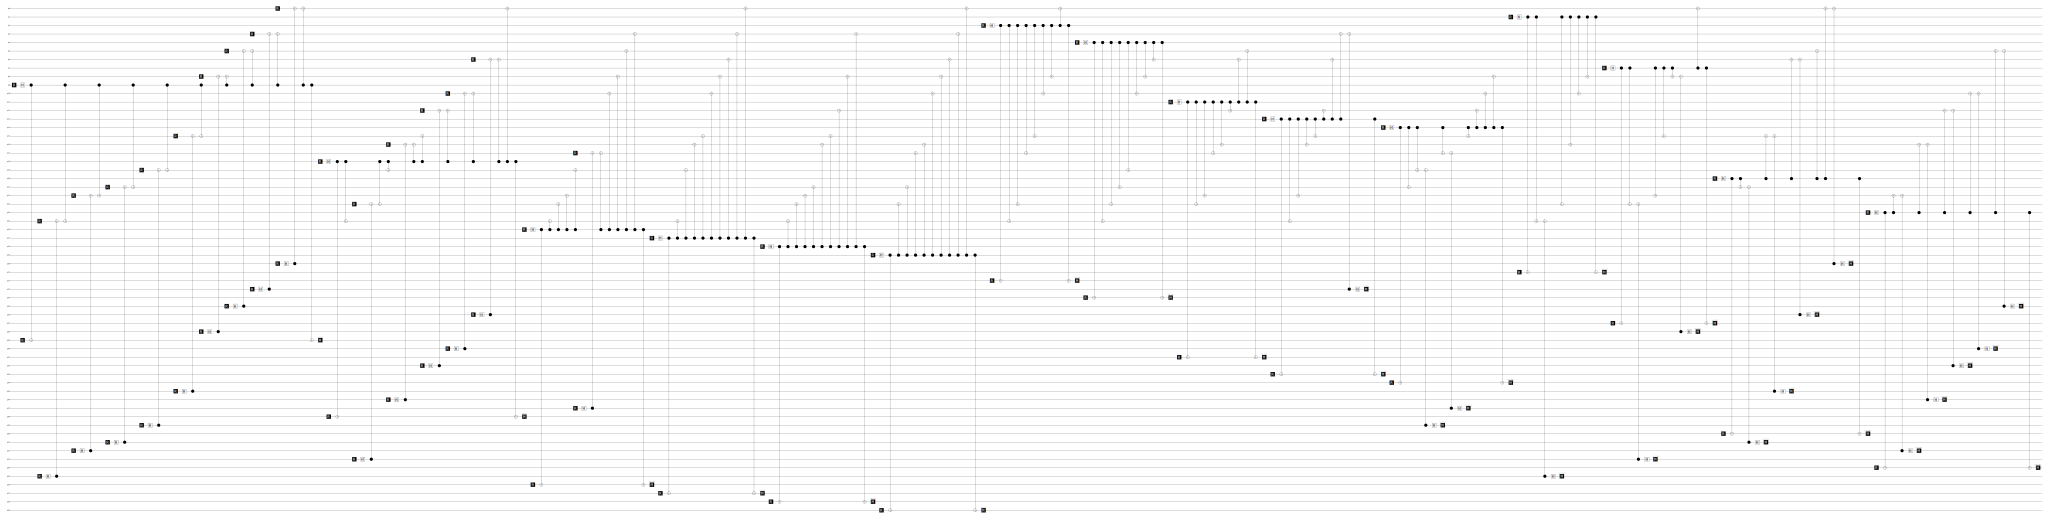

In [8]:
import stim

def FAO_to_stim_circuiut(operation: list[tuple[str, list]]):
    circ = stim.Circuit()
    for o, i in operations:
        circ.append(o, i)
    return circ

c = FAO_to_stim_circuiut(operations)
c.diagram('timeline-svg')

For the logical zero state of the Steane code, one does not need to flag Z errors (since any Z error on the Steane code is equivalent to at most a single qubit Z error up to stabilizers and logical Z operator). Hence one can get a simpler circuit by not flagging Z errors:

This package uses pre-computed gadget found by the [flag at origin program](https://github.com/CQCL/FAOv1). The available gadgets can be seen in the [FTG](../src/FTG) folder. They cover distances 3,5,7,9,11 and number of targets < 30-ish (it varies for different distances; it goes up to 50 for distance 3 and up to 25 for distance 11). If you need a gadget which is not included, you need to first find a gadget using the [flag at origin program](https://github.com/CQCL/FAOv1), then copying it to the FTG folder, then you can use `update_gadget_database("../src/FTG")` function to update the flag-stitcher package's database. 

In [10]:
len([o for o, i in operations if o == "CNOT"])

169